Comparison of transport through boxes in runs with and without variable 3DKzDiff
---------------------------------------

Run13 vs run01 of 3DKzDiff


In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import TransportTools_MITgcm as trt

In [3]:
filename1a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/state.0000000000.glob.nc'
StateOut = Dataset(filename1a)


filename2a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/grid.glob.nc'
GridOut = Dataset(filename2a)


filename3a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/ptracers.0000000000.glob.nc'
PtracersOut = Dataset(filename3a)


filename1b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/stateGlob.nc'
StateOut = Dataset(filename1b)


filename2b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/gridGlob.nc'
GridOut = Dataset(filename2b)


filename3b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/ptracersGlob.nc'
PtracersOut = Dataset(filename3b)


In [4]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = StateOut.variables['Z']
#print(z[10])
Time = StateOut.variables['T']
#print(Time[:])

xc = rout.getField(filename2a, 'XC') # x coords tracer cells

yc = rout.getField(filename2a, 'YC') # y coords tracer cells

bathy = rout.getField(filename2a, 'Depth')


/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


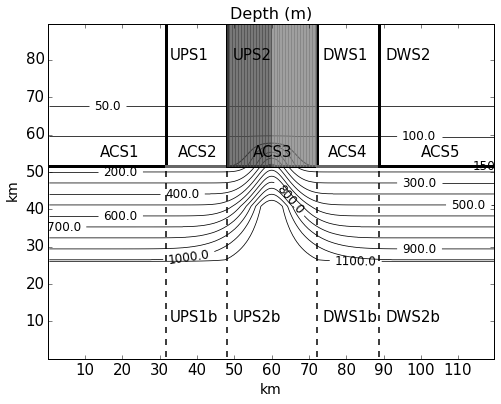

In [5]:
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(8,6))

### Across-Shelf Planes ###

# UPS1b and UPS1
plt.plot(xc[:,40],yc[:,40],'k--',linewidth=1.5 )

plt.plot(xc[197:,40],yc[197:,40],'-',linewidth=3, linestyle='-', color='0.00' )


# UPS2b and UPS2
plt.plot(xc[:,120],yc[:,120],'k--',linewidth=1.5 )

plt.plot(xc[197:,120],yc[197:,120],'-', linewidth=3, linestyle='-', color='0.0')

# DWS1 and DWS1b
plt.plot(xc[:,240],yc[:,240],'k--',linewidth=1.5 )

plt.plot(xc[197:,240],yc[197:,240],'-',linewidth=3, linestyle='-', color='0.0' )


# DWS2 and DWN2b
plt.plot(xc[:,320],yc[:,320],'k--',linewidth=1.5 )

plt.plot(xc[197:,320],yc[197:,320],'-',linewidth=3, linestyle='-', color='0.0' )

### Along Shelf Planes ###

# ACS1 
plt.plot(xc[197,:40],yc[197,:40],'-',linewidth=3, linestyle='-', color='0.0' )

# ACS2
plt.plot(xc[197,40:120],yc[197,40:120],'-', linewidth=3, linestyle='-', color='0.4')

# ACS3
plt.plot(xc[197,120:240],yc[197,120:240],'-',linewidth=3, linestyle='-', color='0.0' )

# ACS4
plt.plot(xc[197,240:320],yc[197,240:320],'-',linewidth=3, linestyle='-', color='0.40' )

# ACS5
plt.plot(xc[197,320:360],yc[197,320:360],'-',linewidth=3, linestyle='-', color='0.0' )

#LID1
plt.plot(xc[197:,120:180],yc[197:,120:180],linewidth=0.75, linestyle='-', color='0.3')

#LID2
plt.plot(xc[197:,180:240],yc[197:,180:240],linewidth=0.75, linestyle='-', color='0.5')

lev = range(200,1200,100)

levels = [50,100,150]+lev

CS = plt.contour(xc,yc,bathy,levels,colors='k',linewidths=[0.75,0.75,1,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75] )

plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=12)



plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('km',fontsize=14)

plt.title('Depth (m)',fontsize=16)

plt.annotate('UPS1', xy=(33000, 80000), xytext=(33000, 80000))
plt.annotate('UPS1b', xy=(33000, 10000), xytext=(33000, 10000))
plt.annotate('UPS2', xy=(50000, 80000), xytext=(50000, 80000))
plt.annotate('UPS2b', xy=(50000, 10000), xytext=(50000, 10000))
plt.annotate('DWS1', xy=(74000, 80000), xytext=(74000, 80000))
plt.annotate('DWS1b', xy=(74000, 10000), xytext=(74000, 10000))
plt.annotate('DWS2', xy=(91000, 80000), xytext=(91000, 80000))
plt.annotate('DWS2b', xy=(91000, 10000), xytext=(91000, 10000))
plt.annotate('ACS1', xy=(14000, 54000), xytext=(14000, 54000))
plt.annotate('ACS2', xy=(35000, 54000), xytext=(35000, 54000))
plt.annotate('ACS3', xy=(55000, 54000), xytext=(55000, 54000))
plt.annotate('ACS4', xy=(75000, 54000), xytext=(75000, 54000))
plt.annotate('ACS5', xy=(100000, 54000), xytext=(100000, 54000))


#plt.savefig('AcrossShoreLines.png', bbox_inches='tight')
#plt.savefig('AcrossShoreLines.pdf', bbox_inches='tight')



The shelf-break isobath upstream of the canyon corresponds to the y-index 197


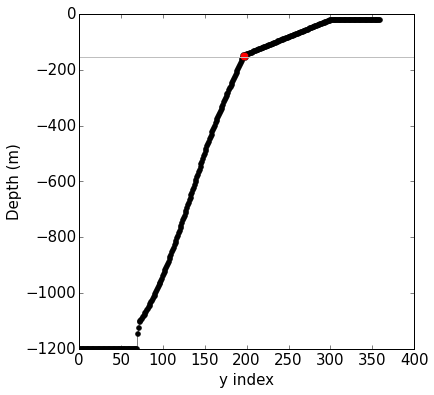

In [6]:
fig = plt.figure(figsize=(6,6))

CS = plt.plot(range(360),-bathy[:,120],'ko-',markersize=5,linewidth=0.5)
plt.plot(197,-bathy[197,120],'ro',markersize=8)
plt.axhline(y=z[30],xmin=0,xmax=360,linestyle='-', color='0.75')

plt.ylabel('Depth (m)')
plt.xlabel('y index')
print('The shelf-break isobath upstream of the canyon corresponds to the y-index 197')

In [7]:
#input

hFacC = rout.getField(filename2a,'HFacC')
dyF = rout.getField(filename2a,'dyF')
dxF = rout.getField(filename2a,'dxF')

drF = GridOut.variables['drF']

ugrida = rout.getField(filename1a,'U')
vgrida = rout.getField(filename1a,'V')

ugridb = rout.getField(filename1b,'U')
vgridb = rout.getField(filename1b,'V')

ua,va = rout.unstagger(ugrida,vgrida)
ub,vb = rout.unstagger(ugridb,vgridb)

Wa = rout.getField(filename1a, 'W')
Wb = rout.getField(filename1b, 'W')

rA = rout.getField(filename2a, 'rA') # same for all runs

days = np.linspace(0,9.5,num=19)

In [8]:
# Transports run13
UPS1 = trt.AdvTransportUPS1(hFacC,dyF,drF,nt,ua,transType=0)
UPS1b= trt.AdvTransportUPS1b(hFacC,dyF,drF,nt,ua,transType=0)
UPS2 = trt.AdvTransportUPS2(hFacC,dyF,drF,nt,ua,transType=0)
UPS2b= trt.AdvTransportUPS2b(hFacC,dyF,drF,nt,ua,transType=0)
DWS1 = trt.AdvTransportDWS1(hFacC,dyF,drF,nt,ua,transType=0)
DWS1b= trt.AdvTransportDWS1b(hFacC,dyF,drF,nt,ua,transType=0)
DWS2 = trt.AdvTransportDWS2(hFacC,dyF,drF,nt,ua,transType=0)
DWS2b= trt.AdvTransportDWS2b(hFacC,dyF,drF,nt,ua,transType=0)

ACS1 = trt.AdvTransportACS1(hFacC,dxF,drF,nt,va,transType=0)
ACS2 = trt.AdvTransportACS2(hFacC,dxF,drF,nt,va,transType=0)
ACS3 = trt.AdvTransportACS3(hFacC,dxF,drF,nt,va,transType=0)
ACS4 = trt.AdvTransportACS4(hFacC,dxF,drF,nt,va,transType=0)
ACS5 = trt.AdvTransportACS5(hFacC,dxF,drF,nt,va,transType=0)
ACS3b = trt.AdvTransportACS3b(hFacC,dxF,drF,nt,va,transType=0)

LID1 = trt.AdvTransportLID1(rA,Wa,nt,transType=0)
LID2 = trt.AdvTransportLID2(rA,Wa,nt,transType=0)


In [9]:
# Transports run01 3DKzDiff
UPS13D = trt.AdvTransportUPS1(hFacC,dyF,drF,nt,ub,transType=0)
UPS1b3D= trt.AdvTransportUPS1b(hFacC,dyF,drF,nt,ub,transType=0)
UPS23D = trt.AdvTransportUPS2(hFacC,dyF,drF,nt,ub,transType=0)
UPS2b3D= trt.AdvTransportUPS2b(hFacC,dyF,drF,nt,ub,transType=0)
DWS13D = trt.AdvTransportDWS1(hFacC,dyF,drF,nt,ub,transType=0)
DWS1b3D= trt.AdvTransportDWS1b(hFacC,dyF,drF,nt,ub,transType=0)
DWS23D = trt.AdvTransportDWS2(hFacC,dyF,drF,nt,ub,transType=0)
DWS2b3D= trt.AdvTransportDWS2b(hFacC,dyF,drF,nt,ub,transType=0)

ACS13D = trt.AdvTransportACS1(hFacC,dxF,drF,nt,vb,transType=0)
ACS23D = trt.AdvTransportACS2(hFacC,dxF,drF,nt,vb,transType=0)
ACS33D = trt.AdvTransportACS3(hFacC,dxF,drF,nt,vb,transType=0)
ACS43D = trt.AdvTransportACS4(hFacC,dxF,drF,nt,vb,transType=0)
ACS53D = trt.AdvTransportACS5(hFacC,dxF,drF,nt,vb,transType=0)
ACS3b3D = trt.AdvTransportACS3b(hFacC,dxF,drF,nt,vb,transType=0)

LID13D = trt.AdvTransportLID1(rA,Wb,nt,transType=0)
LID23D = trt.AdvTransportLID2(rA,Wb,nt,transType=0)

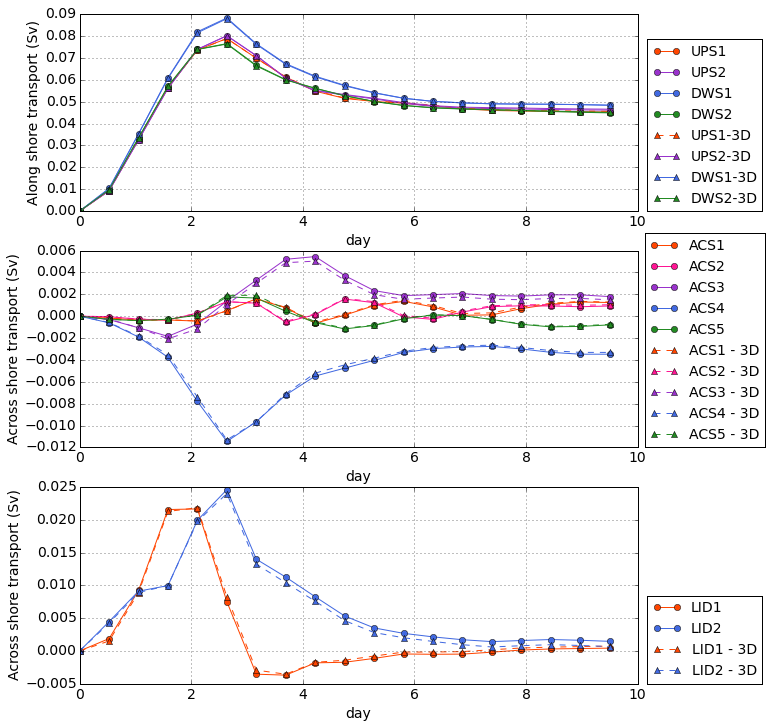

In [24]:
params = {'legend.fontsize': 14}
plt.rcParams.update({'font.size':14})
plt.rcParams.update(params)

fig45=plt.figure(figsize=(10,12))

plt.subplot(3,1,1)

plt.plot(days,UPS1/1E6,'o-',color='orangered',label='UPS1')
plt.plot(days,UPS2/1E6,'o-',color ='darkorchid' ,label='UPS2')
plt.plot(days,DWS1/1E6,'o-',color='royalblue',label='DWS1')
plt.plot(days,DWS2/1E6,'o-',color='forestgreen',label='DWS2')

plt.plot(days,UPS13D/1E6,'^--',color='orangered',label='UPS1-3D')
plt.plot(days,UPS23D/1E6,'^-',color ='darkorchid',label='UPS2-3D')
plt.plot(days,DWS13D/1E6,'^-',color='royalblue',label='DWS1-3D')
plt.plot(days,DWS23D/1E6,'^-',color='forestgreen',label='DWS2-3D')


plt.ylabel('Along shore transport (Sv)')
plt.xlabel('day')
plt.legend(bbox_to_anchor=(1.12, 0.0),loc=8, borderaxespad=0.)
plt.grid()
plt.subplot(3,1,2)

plt.plot(days,ACS1/1E6,'o-',color='orangered',label='ACS1')
plt.plot(days,ACS2/1E6,'o-',color='deeppink',label='ACS2')
plt.plot(days,ACS3/1E6,'o-',color='darkorchid',label='ACS3')
plt.plot(days,ACS4/1E6,'o-',color='royalblue',label='ACS4')
plt.plot(days,ACS5/1E6,'o-',color='forestgreen',label='ACS5')

plt.plot(days,ACS13D/1E6,'^--',color='orangered',label='ACS1 - 3D')
plt.plot(days,ACS23D/1E6,'^--',color='deeppink',label='ACS2 - 3D')
plt.plot(days,ACS33D/1E6,'^--',color='darkorchid',label='ACS3 - 3D')
plt.plot(days,ACS43D/1E6,'^--',color='royalblue',label='ACS4 - 3D')
plt.plot(days,ACS53D/1E6,'^--',color='forestgreen',label='ACS5 - 3D')

plt.grid()
plt.ylabel('Across shore transport (Sv)')
plt.xlabel('day')
plt.legend(bbox_to_anchor=(1.12, 0.0),loc=8, borderaxespad=0.)
plt.subplot(3,1,3)

plt.plot(days,LID1/1E6,'o-',color='orangered',label='LID1')
plt.plot(days,LID2/1E6,'o-',color='royalblue',label='LID2')

plt.plot(days,LID13D/1E6,'^--',color='orangered',label='LID1 - 3D')
plt.plot(days,LID23D/1E6,'^--',color='royalblue',label='LID2 - 3D')

plt.grid()
plt.ylabel('Across shore transport (Sv)')
plt.xlabel('day')

plt.legend(bbox_to_anchor=(1.12, 0.0),loc=8, borderaxespad=0.)


In [11]:
print('mean transport through UPS1 is %f1 m^3/s^{-1}' % np.mean(UPS1))
print('mean transport through UPS2 is %f1 m^3/s^{-1}' % np.mean(UPS2))
print('mean transport through DWS1 is %f1 m^3/s^{-1}' % np.mean(DWS1))
print('mean transport through DWS2 is %f1 m^3/s^{-1}' % np.mean(DWS2))
print('mean transport through ACS1 is %f1 m^3/s^{-1}' % np.mean(ACS1))
print('mean transport through ACS2 is %f1 m^3/s^{-1}' % np.mean(ACS2))
print('mean transport through ACS3 is %f1 m^3/s^{-1}' % np.mean(ACS3))
print('mean transport through ACS4 is %f1 m^3/s^{-1}' % np.mean(ACS4))
print('mean transport through ACS5 is %f1 m^3/s^{-1}' % np.mean(ACS5))
print('mean transport through ACS3b is %f1 m^3/s^{-1}' % np.mean(ACS3b))
print('mean transport through LID1 is %f1 m^3/s^{-1}' % np.mean(LID1))
print('mean transport through LID2 is %f1 m^3/s^{-1} \n' % np.mean(LID2))

print('mean transport through UPS1 during time-dependent phase is %f1 m^3/s^{-1}' % np.mean(UPS1[:10]))
print('mean transport through UPS2 during time-dependent phase is %f1 m^3/s^{-1}' % np.mean(UPS2[:10]))
print('mean transport through DWS1 during time-dependent phase is %f1 m^3/s^{-1}' % np.mean(DWS1[:10]))
print('mean transport through DWS2 during time-dependent phase is %f1 m^3/s^{-1}' % np.mean(DWS2[:10]))
print('mean transport through ACS1 during time-dependent phase is %f1 m^3/s^{-1}' % np.mean(ACS1[:10]))
print('mean transport through ACS2 during time-dependent phase is %f1 m^3/s^{-1}' % np.mean(ACS2[:10]))
print('mean transport through ACS3 during time-dependent phase is %f1 m^3/s^{-1}' % np.mean(ACS3[:10]))
print('mean transport through ACS4 during time-dependent phase is %f1 m^3/s^{-1}' % np.mean(ACS4[:10]))
print('mean transport through ACS5 during time-dependent phase is %f1 m^3/s^{-1}' % np.mean(ACS5[:10]))
print('mean transport through ACS3b during time-dependent phase is %f1 m^3/s^{-1}' % np.mean(ACS3b[:10]))
print('mean transport through LID1 during time-dependent phase is %f1 m^3/s^{-1} ' % np.mean(LID1[:10]))
print('mean transport through LID2 during time-dependent phase is %f1 m^3/s^{-1} \n' % np.mean(LID2[:10]))

print('mean transport through UPS1 after time-dependent phase is %f1 m^3/s^{-1}' % np.mean(UPS1[9:]))
print('mean transport through UPS2 after time-dependent phase is %f1 m^3/s^{-1}' % np.mean(UPS2[9:]))
print('mean transport through DWS1 after time-dependent phase is %f1 m^3/s^{-1}' % np.mean(DWS1[9:]))
print('mean transport through DWS2 after time-dependent phase is %f1 m^3/s^{-1}' % np.mean(DWS2[9:]))
print('mean transport through ACS1 after time-dependent phase is %f1 m^3/s^{-1}' % np.mean(ACS1[9:]))
print('mean transport through ACS2 after time-dependent phase is %f1 m^3/s^{-1}' % np.mean(ACS2[9:]))
print('mean transport through ACS3 after time-dependent phase is %f1 m^3/s^{-1}' % np.mean(ACS3[9:]))
print('mean transport through ACS4 after time-dependent phase is %f1 m^3/s^{-1}' % np.mean(ACS4[9:]))
print('mean transport through ACS5 after time-dependent phase is %f1 m^3/s^{-1}' % np.mean(ACS5[9:]))
print('mean transport through ACS3b after time-dependent phase is %f1 m^3/s^{-1}' % np.mean(ACS3b[9:]))
print('mean transport through LID1 after time-dependent phase is %f1 m^3/s^{-1}' % np.mean(LID1[9:]))
print('mean transport through LID2 after time-dependent phase is %f1 m^3/s^{-1}' % np.mean(LID2[9:]))




mean transport through UPS1 is 47952.8937301 m^3/s^{-1}
mean transport through UPS2 is 48413.3010571 m^3/s^{-1}
mean transport through DWS1 is 52062.8477981 m^3/s^{-1}
mean transport through DWS2 is 47704.1580831 m^3/s^{-1}
mean transport through ACS1 is 457.3677981 m^3/s^{-1}
mean transport through ACS2 is 478.3895491 m^3/s^{-1}
mean transport through ACS3 is 1723.9619571 m^3/s^{-1}
mean transport through ACS4 is -4301.8875991 m^3/s^{-1}
mean transport through ACS5 is -182.1590341 m^3/s^{-1}
mean transport through ACS3b is 1167.3042011 m^3/s^{-1}
mean transport through LID1 is 2608.4751781 m^3/s^{-1}
mean transport through LID2 is 6566.1656681 m^3/s^{-1} 

mean transport through UPS1 during time-dependent phase is 48871.4987381 m^3/s^{-1}
mean transport through UPS2 during time-dependent phase is 49191.4137971 m^3/s^{-1}
mean transport through DWS1 during time-dependent phase is 53996.9254451 m^3/s^{-1}
mean transport through DWS2 during time-dependent phase is 48640.0445731 m^3/s^{-1

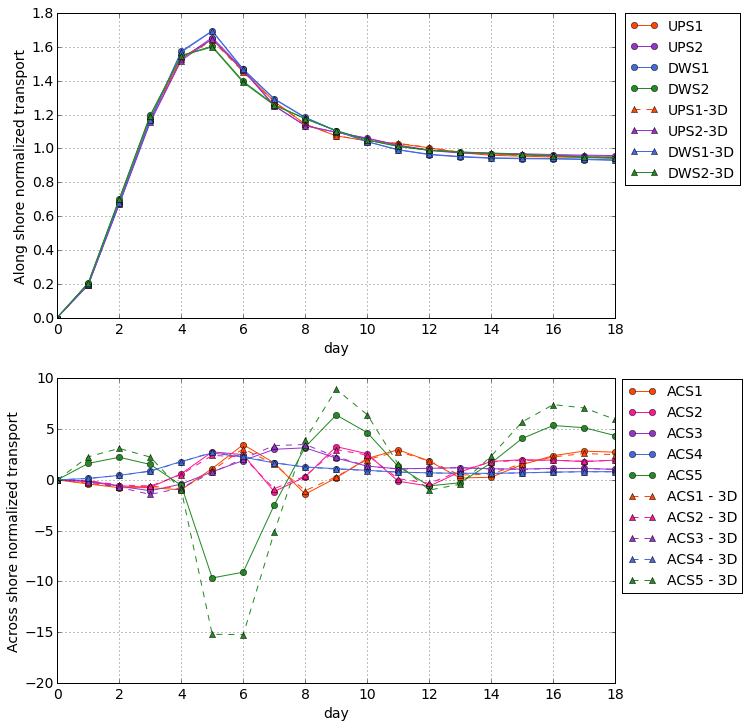

In [12]:
params = {'legend.fontsize': 14}
plt.rcParams.update({'font.size':14})
plt.rcParams.update(params)

fig45=plt.figure(figsize=(10,12))

plt.subplot(2,1,1)

plt.plot(range(19),UPS1/np.mean(UPS1),'o-',color='orangered',label='UPS1')
plt.plot(range(19),UPS2/np.mean(UPS2),'o-',color ='darkorchid' ,label='UPS2')
plt.plot(range(19),DWS1/np.mean(DWS1),'o-',color='royalblue',label='DWS1')
plt.plot(range(19),DWS2/np.mean(DWS2),'o-',color='forestgreen',label='DWS2')

plt.plot(range(19),UPS13D/np.mean(UPS13D),'^--',color='orangered',label='UPS1-3D')
plt.plot(range(19),UPS23D/np.mean(UPS23D),'^-',color ='darkorchid',label='UPS2-3D')
plt.plot(range(19),DWS13D/np.mean(DWS13D),'^-',color='royalblue',label='DWS1-3D')
plt.plot(range(19),DWS23D/np.mean(DWS23D),'^-',color='forestgreen',label='DWS2-3D')


plt.ylabel('Along shore normalized transport ')
plt.xlabel('day')
plt.legend(bbox_to_anchor=(1.12, 0.435),loc=8, borderaxespad=0.)
plt.grid()
plt.subplot(2,1,2)

plt.plot(range(19),ACS1/(np.mean(ACS1)),'o-',color='orangered',label='ACS1')
plt.plot(range(19),ACS2/(np.mean(ACS2)),'o-',color='deeppink',label='ACS2')
plt.plot(range(19),ACS3/(np.mean(ACS3)),'o-',color='darkorchid',label='ACS3')
plt.plot(range(19),ACS4/(np.mean(ACS4)),'o-',color='royalblue',label='ACS4')
plt.plot(range(19),ACS5/(np.mean(ACS5)),'o-',color='forestgreen',label='ACS5')

plt.plot(range(19),ACS13D/(np.mean(ACS13D)),'^--',color='orangered',label='ACS1 - 3D')
plt.plot(range(19),ACS23D/(np.mean(ACS23D)),'^--',color='deeppink',label='ACS2 - 3D')
plt.plot(range(19),ACS33D/(np.mean(ACS33D)),'^--',color='darkorchid',label='ACS3 - 3D')
plt.plot(range(19),ACS43D/(np.mean(ACS43D)),'^--',color='royalblue',label='ACS4 - 3D')
plt.plot(range(19),ACS53D/(np.mean(ACS53D)),'^--',color='forestgreen',label='ACS5 - 3D')

plt.grid()
plt.ylabel('Across shore normalized transport ')
plt.xlabel('day')
plt.legend(bbox_to_anchor=(1.12, 0.295),loc=8, borderaxespad=0.)



In [13]:
Tempa = rout.getField(filename1a,'Temp')
Tempb = rout.getField(filename1b,'Temp')


In [14]:
# Transports run13
TUPS1 = trt.AdvTransportUPS1(hFacC,dyF,drF,nt,ua,Tr=Tempa,transType=1)
TUPS1b= trt.AdvTransportUPS1b(hFacC,dyF,drF,nt,ua,Tr=Tempa,transType=1)
TUPS2 = trt.AdvTransportUPS2(hFacC,dyF,drF,nt,ua,Tr=Tempa,transType=1)
TUPS2b= trt.AdvTransportUPS2b(hFacC,dyF,drF,nt,ua,Tr=Tempa,transType=1)
TDWS1 = trt.AdvTransportDWS1(hFacC,dyF,drF,nt,ua,Tr=Tempa,transType=1)
TDWS1b= trt.AdvTransportDWS1b(hFacC,dyF,drF,nt,ua,Tr=Tempa,transType=1)
TDWS2 = trt.AdvTransportDWS2(hFacC,dyF,drF,nt,ua,Tr=Tempa,transType=1)
TDWS2b= trt.AdvTransportDWS2b(hFacC,dyF,drF,nt,ua,Tr=Tempa,transType=1)

TACS1 = trt.AdvTransportACS1(hFacC,dxF,drF,nt,va,Tr=Tempa,transType=1)
TACS2 = trt.AdvTransportACS2(hFacC,dxF,drF,nt,va,Tr=Tempa,transType=1)
TACS3 = trt.AdvTransportACS3(hFacC,dxF,drF,nt,va,Tr=Tempa,transType=1)
TACS4 = trt.AdvTransportACS4(hFacC,dxF,drF,nt,va,Tr=Tempa,transType=1)
TACS5 = trt.AdvTransportACS5(hFacC,dxF,drF,nt,va,Tr=Tempa,transType=1)

# Transports run01 3DKzDiff
TUPS13D = trt.AdvTransportUPS1(hFacC,dyF,drF,nt,ub,Tr=Tempb,transType=1)
TUPS1b3D= trt.AdvTransportUPS1b(hFacC,dyF,drF,nt,ub,Tr=Tempb,transType=1)
TUPS23D = trt.AdvTransportUPS2(hFacC,dyF,drF,nt,ub,Tr=Tempb,transType=1)
TUPS2b3D= trt.AdvTransportUPS2b(hFacC,dyF,drF,nt,ub,Tr=Tempb,transType=1)
TDWS13D = trt.AdvTransportDWS1(hFacC,dyF,drF,nt,ub,Tr=Tempb,transType=1)
TDWS1b3D= trt.AdvTransportDWS1b(hFacC,dyF,drF,nt,ub,Tr=Tempb,transType=1)
TDWS23D = trt.AdvTransportDWS2(hFacC,dyF,drF,nt,ub,Tr=Tempb,transType=1)
TDWS2b3D= trt.AdvTransportDWS2b(hFacC,dyF,drF,nt,ub,Tr=Tempb,transType=1)

TACS13D = trt.AdvTransportACS1(hFacC,dxF,drF,nt,vb,Tr=Tempb,transType=1)
TACS23D = trt.AdvTransportACS2(hFacC,dxF,drF,nt,vb,Tr=Tempb,transType=1)
TACS33D = trt.AdvTransportACS3(hFacC,dxF,drF,nt,vb,Tr=Tempb,transType=1)
TACS43D = trt.AdvTransportACS4(hFacC,dxF,drF,nt,vb,Tr=Tempb,transType=1)
TACS53D = trt.AdvTransportACS5(hFacC,dxF,drF,nt,vb,Tr=Tempb,transType=1)

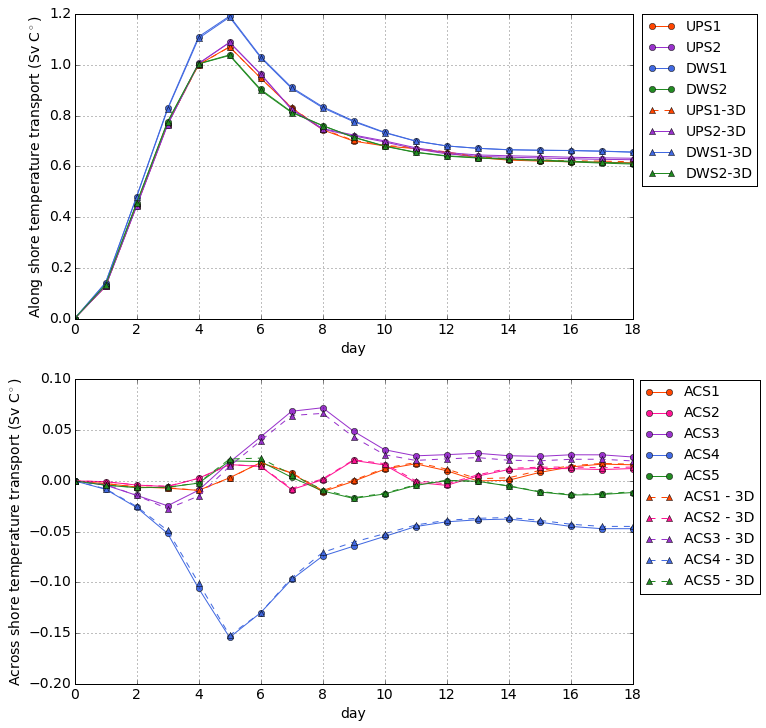

In [15]:
params = {'legend.fontsize': 14}
plt.rcParams.update({'font.size':14})
plt.rcParams.update(params)

fig45=plt.figure(figsize=(10,12))

plt.subplot(2,1,1)

plt.plot(range(19),TUPS1/1E6,'o-',color='orangered',label='UPS1')
plt.plot(range(19),TUPS2/1E6,'o-',color ='darkorchid' ,label='UPS2')
plt.plot(range(19),TDWS1/1E6,'o-',color='royalblue',label='DWS1')
plt.plot(range(19),TDWS2/1E6,'o-',color='forestgreen',label='DWS2')

plt.plot(range(19),TUPS13D/1E6,'^--',color='orangered',label='UPS1-3D')
plt.plot(range(19),TUPS23D/1E6,'^-',color ='darkorchid',label='UPS2-3D')
plt.plot(range(19),TDWS13D/1E6,'^-',color='royalblue',label='DWS1-3D')
plt.plot(range(19),TDWS23D/1E6,'^-',color='forestgreen',label='DWS2-3D')


plt.ylabel('Along shore temperature transport (Sv C$^{\circ}$)')
plt.xlabel('day')
plt.legend(bbox_to_anchor=(1.12, 0.435),loc=8, borderaxespad=0.)
plt.grid()
plt.subplot(2,1,2)

plt.plot(range(19),TACS1/1E6,'o-',color='orangered',label='ACS1')
plt.plot(range(19),TACS2/1E6,'o-',color='deeppink',label='ACS2')
plt.plot(range(19),TACS3/1E6,'o-',color='darkorchid',label='ACS3')
plt.plot(range(19),TACS4/1E6,'o-',color='royalblue',label='ACS4')
plt.plot(range(19),TACS5/1E6,'o-',color='forestgreen',label='ACS5')

plt.plot(range(19),TACS13D/1E6,'^--',color='orangered',label='ACS1 - 3D')
plt.plot(range(19),TACS23D/1E6,'^--',color='deeppink',label='ACS2 - 3D')
plt.plot(range(19),TACS33D/1E6,'^--',color='darkorchid',label='ACS3 - 3D')
plt.plot(range(19),TACS43D/1E6,'^--',color='royalblue',label='ACS4 - 3D')
plt.plot(range(19),TACS53D/1E6,'^--',color='forestgreen',label='ACS5 - 3D')

plt.grid()
plt.ylabel('Across shore temperature transport (Sv C$^{\circ}$)')
plt.xlabel('day')
plt.legend(bbox_to_anchor=(1.12, 0.295),loc=8, borderaxespad=0.)

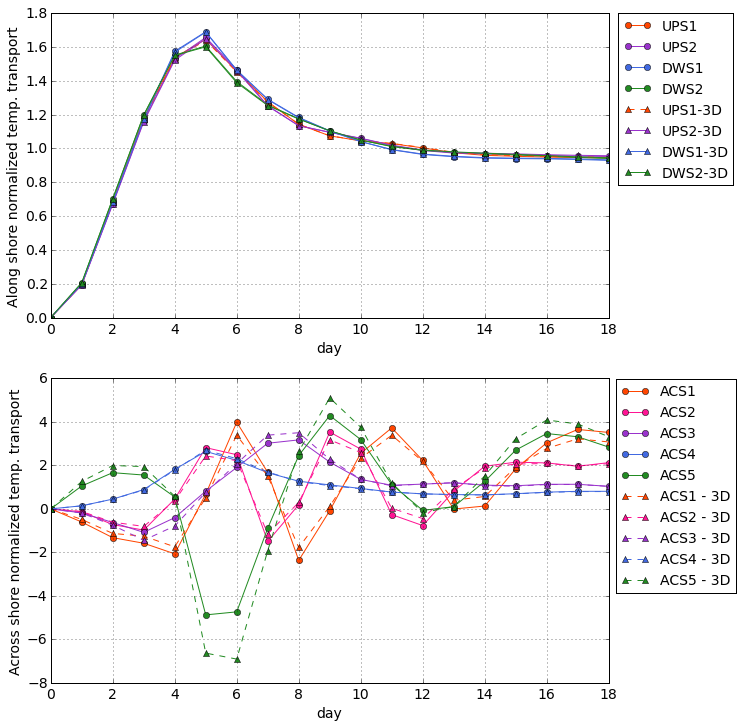

In [16]:
params = {'legend.fontsize': 14}
plt.rcParams.update({'font.size':14})
plt.rcParams.update(params)

fig45=plt.figure(figsize=(10,12))

plt.subplot(2,1,1)

plt.plot(range(19),TUPS1/np.mean(TUPS1),'o-',color='orangered',label='UPS1')
plt.plot(range(19),TUPS2/np.mean(TUPS2),'o-',color ='darkorchid' ,label='UPS2')
plt.plot(range(19),TDWS1/np.mean(TDWS1),'o-',color='royalblue',label='DWS1')
plt.plot(range(19),TDWS2/np.mean(TDWS2),'o-',color='forestgreen',label='DWS2')

plt.plot(range(19),TUPS13D/np.mean(TUPS13D),'^--',color='orangered',label='UPS1-3D')
plt.plot(range(19),TUPS23D/np.mean(TUPS23D),'^-',color ='darkorchid',label='UPS2-3D')
plt.plot(range(19),TDWS13D/np.mean(TDWS13D),'^-',color='royalblue',label='DWS1-3D')
plt.plot(range(19),TDWS23D/np.mean(TDWS23D),'^-',color='forestgreen',label='DWS2-3D')


plt.ylabel('Along shore normalized temp. transport  ')
plt.xlabel('day')
plt.legend(bbox_to_anchor=(1.12, 0.435),loc=8, borderaxespad=0.)
plt.grid()
plt.subplot(2,1,2)

plt.plot(range(19),TACS1/(np.mean(TACS1)),'o-',color='orangered',label='ACS1')
plt.plot(range(19),TACS2/(np.mean(TACS2)),'o-',color='deeppink',label='ACS2')
plt.plot(range(19),TACS3/(np.mean(TACS3)),'o-',color='darkorchid',label='ACS3')
plt.plot(range(19),TACS4/(np.mean(TACS4)),'o-',color='royalblue',label='ACS4')
plt.plot(range(19),TACS5/(np.mean(TACS5)),'o-',color='forestgreen',label='ACS5')

plt.plot(range(19),TACS13D/(np.mean(TACS13D)),'^--',color='orangered',label='ACS1 - 3D')
plt.plot(range(19),TACS23D/(np.mean(TACS23D)),'^--',color='deeppink',label='ACS2 - 3D')
plt.plot(range(19),TACS33D/(np.mean(TACS33D)),'^--',color='darkorchid',label='ACS3 - 3D')
plt.plot(range(19),TACS43D/(np.mean(TACS43D)),'^--',color='royalblue',label='ACS4 - 3D')
plt.plot(range(19),TACS53D/(np.mean(TACS53D)),'^--',color='forestgreen',label='ACS5 - 3D')

plt.grid()
plt.ylabel('Across shore normalized temp. transport  ')
plt.xlabel('day')
plt.legend(bbox_to_anchor=(1.12, 0.295),loc=8, borderaxespad=0.)

In [17]:
#


filename1c='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run12/state.0000000000.glob.nc'
filename3c='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run12/ptracers.0000000000.glob.nc'
filename1d='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run14/state.0000000000.glob.nc'
filename3d='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run14/ptracers.0000000000.glob.nc'


Tr1a = rout.getField(filename3a,'Tr1')
Tr2a = rout.getField(filename3a,'Tr2')
Tr3a = rout.getField(filename3a,'Tr3')

Tr1b = rout.getField(filename3b,'Tr1')


In [18]:
# Transports run13
Tr1UPS1 = trt.AdvTransportUPS1(hFacC,dyF,drF,nt,ua,Tr=Tr1a,transType=1)
Tr1UPS1b= trt.AdvTransportUPS1b(hFacC,dyF,drF,nt,ua,Tr=Tr1a,transType=1)
Tr1UPS2 = trt.AdvTransportUPS2(hFacC,dyF,drF,nt,ua,Tr=Tr1a,transType=1)
Tr1UPS2b= trt.AdvTransportUPS2b(hFacC,dyF,drF,nt,ua,Tr=Tr1a,transType=1)
Tr1DWS1 = trt.AdvTransportDWS1(hFacC,dyF,drF,nt,ua,Tr=Tr1a,transType=1)
Tr1DWS1b= trt.AdvTransportDWS1b(hFacC,dyF,drF,nt,ua,Tr=Tr1a,transType=1)
Tr1DWS2 = trt.AdvTransportDWS2(hFacC,dyF,drF,nt,ua,Tr=Tr1a,transType=1)
Tr1DWS2b= trt.AdvTransportDWS2b(hFacC,dyF,drF,nt,ua,Tr=Tr1a,transType=1)

Tr1ACS1 = trt.AdvTransportACS1(hFacC,dxF,drF,nt,va,Tr=Tr1a,transType=1)
Tr1ACS2 = trt.AdvTransportACS2(hFacC,dxF,drF,nt,va,Tr=Tr1a,transType=1)
Tr1ACS3 = trt.AdvTransportACS3(hFacC,dxF,drF,nt,va,Tr=Tr1a,transType=1)
Tr1ACS4 = trt.AdvTransportACS4(hFacC,dxF,drF,nt,va,Tr=Tr1a,transType=1)
Tr1ACS5 = trt.AdvTransportACS5(hFacC,dxF,drF,nt,va,Tr=Tr1a,transType=1)

# Transports run01 3DKzDiff
Tr1UPS13D = trt.AdvTransportUPS1(hFacC,dyF,drF,nt,ub,Tr=Tr1b,transType=1)
Tr1UPS1b3D= trt.AdvTransportUPS1b(hFacC,dyF,drF,nt,ub,Tr=Tr1b,transType=1)
Tr1UPS23D = trt.AdvTransportUPS2(hFacC,dyF,drF,nt,ub,Tr=Tr1b,transType=1)
Tr1UPS2b3D= trt.AdvTransportUPS2b(hFacC,dyF,drF,nt,ub,Tr=Tr1b,transType=1)
Tr1DWS13D = trt.AdvTransportDWS1(hFacC,dyF,drF,nt,ub,Tr=Tr1b,transType=1)
Tr1DWS1b3D= trt.AdvTransportDWS1b(hFacC,dyF,drF,nt,ub,Tr=Tr1b,transType=1)
Tr1DWS23D = trt.AdvTransportDWS2(hFacC,dyF,drF,nt,ub,Tr=Tr1b,transType=1)
Tr1DWS2b3D= trt.AdvTransportDWS2b(hFacC,dyF,drF,nt,ub,Tr=Tr1b,transType=1)

Tr1ACS13D = trt.AdvTransportACS1(hFacC,dxF,drF,nt,vb,Tr=Tr1b,transType=1)
Tr1ACS23D = trt.AdvTransportACS2(hFacC,dxF,drF,nt,vb,Tr=Tr1b,transType=1)
Tr1ACS33D = trt.AdvTransportACS3(hFacC,dxF,drF,nt,vb,Tr=Tr1b,transType=1)
Tr1ACS43D = trt.AdvTransportACS4(hFacC,dxF,drF,nt,vb,Tr=Tr1b,transType=1)
Tr1ACS53D = trt.AdvTransportACS5(hFacC,dxF,drF,nt,vb,Tr=Tr1b,transType=1)

# Transports run13 Tr2
Tr2UPS1 = trt.AdvTransportUPS1(hFacC,dyF,drF,nt,ua,Tr=Tr2a,transType=1)
Tr2UPS1b= trt.AdvTransportUPS1b(hFacC,dyF,drF,nt,ua,Tr=Tr2a,transType=1)
Tr2UPS2 = trt.AdvTransportUPS2(hFacC,dyF,drF,nt,ua,Tr=Tr2a,transType=1)
Tr2UPS2b= trt.AdvTransportUPS2b(hFacC,dyF,drF,nt,ua,Tr=Tr2a,transType=1)
Tr2DWS1 = trt.AdvTransportDWS1(hFacC,dyF,drF,nt,ua,Tr=Tr2a,transType=1)
Tr2DWS1b= trt.AdvTransportDWS1b(hFacC,dyF,drF,nt,ua,Tr=Tr2a,transType=1)
Tr2DWS2 = trt.AdvTransportDWS2(hFacC,dyF,drF,nt,ua,Tr=Tr2a,transType=1)
Tr2DWS2b= trt.AdvTransportDWS2b(hFacC,dyF,drF,nt,ua,Tr=Tr2a,transType=1)

Tr2ACS1 = trt.AdvTransportACS1(hFacC,dxF,drF,nt,va,Tr=Tr2a,transType=1)
Tr2ACS2 = trt.AdvTransportACS2(hFacC,dxF,drF,nt,va,Tr=Tr2a,transType=1)
Tr2ACS3 = trt.AdvTransportACS3(hFacC,dxF,drF,nt,va,Tr=Tr2a,transType=1)
Tr2ACS4 = trt.AdvTransportACS4(hFacC,dxF,drF,nt,va,Tr=Tr2a,transType=1)
Tr2ACS5 = trt.AdvTransportACS5(hFacC,dxF,drF,nt,va,Tr=Tr2a,transType=1)

# Transports run13 Tr3
Tr3UPS1 = trt.AdvTransportUPS1(hFacC,dyF,drF,nt,ua,Tr=Tr3a,transType=1)
Tr3UPS1b= trt.AdvTransportUPS1b(hFacC,dyF,drF,nt,ua,Tr=Tr3a,transType=1)
Tr3UPS2 = trt.AdvTransportUPS2(hFacC,dyF,drF,nt,ua,Tr=Tr3a,transType=1)
Tr3UPS2b= trt.AdvTransportUPS2b(hFacC,dyF,drF,nt,ua,Tr=Tr3a,transType=1)
Tr3DWS1 = trt.AdvTransportDWS1(hFacC,dyF,drF,nt,ua,Tr=Tr3a,transType=1)
Tr3DWS1b= trt.AdvTransportDWS1b(hFacC,dyF,drF,nt,ua,Tr=Tr3a,transType=1)
Tr3DWS2 = trt.AdvTransportDWS2(hFacC,dyF,drF,nt,ua,Tr=Tr3a,transType=1)
Tr3DWS2b= trt.AdvTransportDWS2b(hFacC,dyF,drF,nt,ua,Tr=Tr3a,transType=1)

Tr3ACS1 = trt.AdvTransportACS1(hFacC,dxF,drF,nt,va,Tr=Tr3a,transType=1)
Tr3ACS2 = trt.AdvTransportACS2(hFacC,dxF,drF,nt,va,Tr=Tr3a,transType=1)
Tr3ACS3 = trt.AdvTransportACS3(hFacC,dxF,drF,nt,va,Tr=Tr3a,transType=1)
Tr3ACS4 = trt.AdvTransportACS4(hFacC,dxF,drF,nt,va,Tr=Tr3a,transType=1)
Tr3ACS5 = trt.AdvTransportACS5(hFacC,dxF,drF,nt,va,Tr=Tr3a,transType=1)



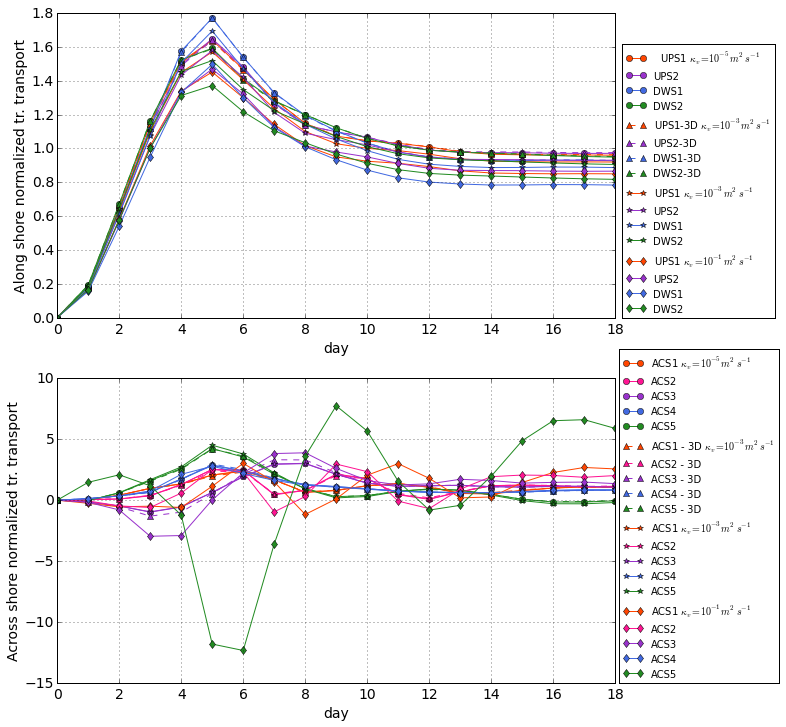

In [21]:
params = {'legend.fontsize': 10}
plt.rcParams.update({'font.size':14})
plt.rcParams.update(params)

fig45=plt.figure(figsize=(10,12))

plt.subplot(2,1,1)

plt.plot(range(19),Tr1UPS1/np.mean(Tr1UPS1),'o-',color='orangered',label='  UPS1 $\kappa_{v}=10^{-5}m^2s^{-1}$')
plt.plot(range(19),Tr1UPS2/np.mean(Tr1UPS2),'o-',color ='darkorchid' ,label='UPS2')
plt.plot(range(19),Tr1DWS1/np.mean(Tr1DWS1),'o-',color='royalblue',label='DWS1')
plt.plot(range(19),Tr1DWS2/np.mean(Tr1DWS2),'o-',color='forestgreen',label='DWS2')

plt.plot(range(19),Tr1UPS13D/np.mean(Tr1UPS13D),'^--',color='orangered',label='UPS1-3D $\kappa_{v}=10^{-3}m^2s^{-1}$')
plt.plot(range(19),Tr1UPS23D/np.mean(Tr1UPS23D),'^--',color ='darkorchid',label='UPS2-3D')
plt.plot(range(19),Tr1DWS13D/np.mean(Tr1DWS13D),'^--',color='royalblue',label='DWS1-3D')
plt.plot(range(19),Tr1DWS23D/np.mean(Tr1DWS23D),'^--',color='forestgreen',label='DWS2-3D')

plt.plot(range(19),Tr1UPS1/np.mean(Tr2UPS1),'*-',color='orangered',label='UPS1 $\kappa_{v}=10^{-3}m^2s^{-1}$')
plt.plot(range(19),Tr1UPS2/np.mean(Tr2UPS2),'*-',color ='darkorchid' ,label='UPS2')
plt.plot(range(19),Tr1DWS1/np.mean(Tr2DWS1),'*-',color='royalblue',label='DWS1')
plt.plot(range(19),Tr1DWS2/np.mean(Tr2DWS2),'*-',color='forestgreen',label='DWS2')

plt.plot(range(19),Tr1UPS1/np.mean(Tr3UPS1),'d-',color='orangered',label='UPS1 $\kappa_{v}=10^{-1}m^2s^{-1}$')
plt.plot(range(19),Tr1UPS2/np.mean(Tr3UPS2),'d-',color ='darkorchid' ,label='UPS2')
plt.plot(range(19),Tr1DWS1/np.mean(Tr3DWS1),'d-',color='royalblue',label='DWS1')
plt.plot(range(19),Tr1DWS2/np.mean(Tr3DWS2),'d-',color='forestgreen',label='DWS2')


plt.ylabel('Along shore normalized tr. transport  ')
plt.xlabel('day')
plt.legend(bbox_to_anchor=(1.15, 0.0),loc=8, borderaxespad=0.)
plt.grid()
plt.subplot(2,1,2)

plt.plot(range(19),Tr1ACS1/(np.mean(Tr1ACS1)),'o-',color='orangered',label='ACS1 $\kappa_{v}=10^{-5}m^2s^{-1}$')
plt.plot(range(19),Tr1ACS2/(np.mean(Tr1ACS2)),'o-',color='deeppink',label='ACS2')
plt.plot(range(19),Tr1ACS3/(np.mean(Tr1ACS3)),'o-',color='darkorchid',label='ACS3')
plt.plot(range(19),Tr1ACS4/(np.mean(Tr1ACS4)),'o-',color='royalblue',label='ACS4')
plt.plot(range(19),Tr1ACS5/(np.mean(Tr1ACS5)),'o-',color='forestgreen',label='ACS5')

plt.plot(range(19),Tr1ACS13D/(np.mean(Tr1ACS13D)),'^--',color='orangered',label='ACS1 - 3D $\kappa_{v}=10^{-3}m^2s^{-1}$')
plt.plot(range(19),Tr1ACS23D/(np.mean(Tr1ACS23D)),'^--',color='deeppink',label='ACS2 - 3D')
plt.plot(range(19),Tr1ACS33D/(np.mean(Tr1ACS33D)),'^--',color='darkorchid',label='ACS3 - 3D')
plt.plot(range(19),Tr1ACS43D/(np.mean(Tr1ACS43D)),'^--',color='royalblue',label='ACS4 - 3D')
plt.plot(range(19),Tr1ACS53D/(np.mean(Tr1ACS53D)),'^--',color='forestgreen',label='ACS5 - 3D')

plt.plot(range(19),Tr2ACS1/(np.mean(Tr2ACS1)),'*-',color='orangered',label='ACS1 $\kappa_{v}=10^{-3}m^2s^{-1}$')
plt.plot(range(19),Tr2ACS2/(np.mean(Tr2ACS2)),'*-',color='deeppink',label='ACS2')
plt.plot(range(19),Tr2ACS3/(np.mean(Tr2ACS3)),'*-',color='darkorchid',label='ACS3')
plt.plot(range(19),Tr2ACS4/(np.mean(Tr2ACS4)),'*-',color='royalblue',label='ACS4')
plt.plot(range(19),Tr2ACS5/(np.mean(Tr2ACS5)),'*-',color='forestgreen',label='ACS5')

plt.plot(range(19),Tr3ACS1/(np.mean(Tr3ACS1)),'d-',color='orangered',label='ACS1 $\kappa_{v}=10^{-1}m^2s^{-1}$')
plt.plot(range(19),Tr3ACS2/(np.mean(Tr3ACS2)),'d-',color='deeppink',label='ACS2')
plt.plot(range(19),Tr3ACS3/(np.mean(Tr3ACS3)),'d-',color='darkorchid',label='ACS3')
plt.plot(range(19),Tr3ACS4/(np.mean(Tr3ACS4)),'d-',color='royalblue',label='ACS4')
plt.plot(range(19),Tr3ACS5/(np.mean(Tr3ACS5)),'d-',color='forestgreen',label='ACS5')

plt.grid()
plt.ylabel('Across shore normalized tr. transport  ')
plt.xlabel('day')
plt.legend(bbox_to_anchor=(1.15, 0.0),loc=8, borderaxespad=0.)

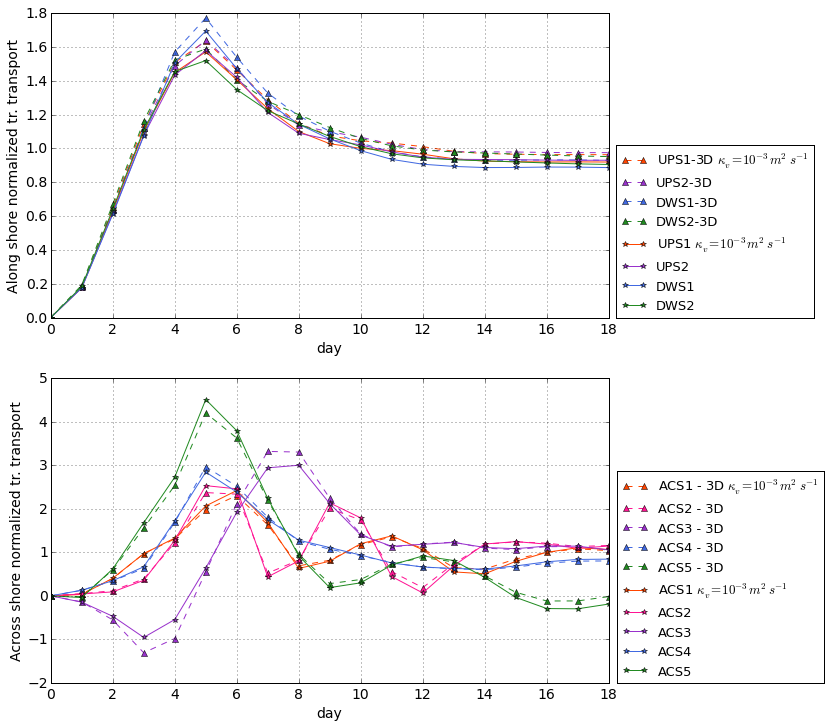

In [20]:
params = {'legend.fontsize': 13}
plt.rcParams.update({'font.size':14})
plt.rcParams.update(params)

fig45=plt.figure(figsize=(10,12))

plt.subplot(2,1,1)


plt.plot(range(19),Tr1UPS13D/np.mean(Tr1UPS13D),'^--',color='orangered',label='UPS1-3D $\kappa_{v}=10^{-3}m^2s^{-1}$')
plt.plot(range(19),Tr1UPS23D/np.mean(Tr1UPS23D),'^--',color ='darkorchid',label='UPS2-3D')
plt.plot(range(19),Tr1DWS13D/np.mean(Tr1DWS13D),'^--',color='royalblue',label='DWS1-3D')
plt.plot(range(19),Tr1DWS23D/np.mean(Tr1DWS23D),'^--',color='forestgreen',label='DWS2-3D')

plt.plot(range(19),Tr1UPS1/np.mean(Tr2UPS1),'*-',color='orangered',label='UPS1 $\kappa_{v}=10^{-3}m^2s^{-1}$')
plt.plot(range(19),Tr1UPS2/np.mean(Tr2UPS2),'*-',color ='darkorchid' ,label='UPS2')
plt.plot(range(19),Tr1DWS1/np.mean(Tr2DWS1),'*-',color='royalblue',label='DWS1')
plt.plot(range(19),Tr1DWS2/np.mean(Tr2DWS2),'*-',color='forestgreen',label='DWS2')



plt.ylabel('Along shore normalized tr. transport  ')
plt.xlabel('day')
plt.legend(bbox_to_anchor=(1.19, 0.0),loc=8, borderaxespad=0.)
plt.grid()
plt.subplot(2,1,2)


plt.plot(range(19),Tr1ACS13D/(np.mean(Tr1ACS13D)),'^--',color='orangered',label='ACS1 - 3D $\kappa_{v}=10^{-3}m^2s^{-1}$')
plt.plot(range(19),Tr1ACS23D/(np.mean(Tr1ACS23D)),'^--',color='deeppink',label='ACS2 - 3D')
plt.plot(range(19),Tr1ACS33D/(np.mean(Tr1ACS33D)),'^--',color='darkorchid',label='ACS3 - 3D')
plt.plot(range(19),Tr1ACS43D/(np.mean(Tr1ACS43D)),'^--',color='royalblue',label='ACS4 - 3D')
plt.plot(range(19),Tr1ACS53D/(np.mean(Tr1ACS53D)),'^--',color='forestgreen',label='ACS5 - 3D')

plt.plot(range(19),Tr2ACS1/(np.mean(Tr2ACS1)),'*-',color='orangered',label='ACS1 $\kappa_{v}=10^{-3}m^2s^{-1}$')
plt.plot(range(19),Tr2ACS2/(np.mean(Tr2ACS2)),'*-',color='deeppink',label='ACS2')
plt.plot(range(19),Tr2ACS3/(np.mean(Tr2ACS3)),'*-',color='darkorchid',label='ACS3')
plt.plot(range(19),Tr2ACS4/(np.mean(Tr2ACS4)),'*-',color='royalblue',label='ACS4')
plt.plot(range(19),Tr2ACS5/(np.mean(Tr2ACS5)),'*-',color='forestgreen',label='ACS5')


plt.grid()
plt.ylabel('Across shore normalized tr. transport  ')
plt.xlabel('day')
plt.legend(bbox_to_anchor=(1.20, 0.0),loc=8, borderaxespad=0.)